In [5]:
import numpy as np
import pandas as pd
import xarray as xr

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline


In [17]:
!wget ftp://sidads.colorado.edu/DATASETS/NOAA/G02158/masked/2003/12_Dec/SNODAS_20031230.tar

--2020-05-29 14:24:57--  ftp://sidads.colorado.edu/DATASETS/NOAA/G02158/masked/2003/12_Dec/SNODAS_20031230.tar
           => ‘SNODAS_20031230.tar’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /DATASETS/NOAA/G02158/masked/2003/12_Dec ... done.
==> SIZE SNODAS_20031230.tar ... 15011840
==> PASV ... done.    ==> RETR SNODAS_20031230.tar ... done.
Length: 15011840 (14M) (unauthoritative)

100%[======================================>] 15,011,840  2.48MB/s   in 6.3s   

2020-05-29 14:25:04 (2.29 MB/s) - ‘SNODAS_20031230.tar’ saved [15011840]



In [18]:
!tar xvf SNODAS_20031230.tar

us_ssmv01025SlL00T0024TTNATS2003123005DP001.dat.gz
us_ssmv01025SlL00T0024TTNATS2003123005DP001.txt.gz
us_ssmv01025SlL01T0024TTNATS2003123005DP001.dat.gz
us_ssmv01025SlL01T0024TTNATS2003123005DP001.txt.gz
us_ssmv11034tS__T0001TTNATS2003123005HP001.dat.gz
us_ssmv11034tS__T0001TTNATS2003123005HP001.txt.gz
us_ssmv11036tS__T0001TTNATS2003123005HP001.dat.gz
us_ssmv11036tS__T0001TTNATS2003123005HP001.txt.gz
us_ssmv11039lL00T0024TTNATS2003123005DP000.dat.gz
us_ssmv11039lL00T0024TTNATS2003123005DP000.txt.gz
us_ssmv11044bS__T0024TTNATS2003123005DP000.dat.gz
us_ssmv11044bS__T0024TTNATS2003123005DP000.txt.gz
us_ssmv11050lL00T0024TTNATS2003123005DP000.dat.gz
us_ssmv11050lL00T0024TTNATS2003123005DP000.txt.gz


In [19]:
!mkdir SNODAS_20031230

In [20]:
!mv us_ssmv* SNODAS_20031230/

In [21]:
!gzip -d SNODAS_20031230/us_ssmv11034tS__T0001TTNATS2003123005HP001.dat.gz

In [22]:
!gzip -d SNODAS_20031230/us_ssmv11034tS__T0001TTNATS2003123005HP001.txt.gz

# AFTER LAURA'S INPUT

In [34]:
prova = prova.drop('band')
prova

<xarray.DataArray (band: 1, y: 3351, x: 6935)>
[23239185 values with dtype=int16]
Coordinates:
  * y        (y) float64 52.87 52.86 52.85 52.85 ... 24.98 24.97 24.96 24.95
  * x        (x) float64 -124.7 -124.7 -124.7 -124.7 ... -66.96 -66.95 -66.95
Dimensions without coordinates: band
Attributes:
    transform:   (0.008333333333333, 0.0, -124.73374999999501, 0.0, -0.008333...
    crs:         +init=epsg:4326
    res:         (0.008333333333333, 0.008333333333333)
    is_tiled:    0
    nodatavals:  (-9999.0,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [54]:
data_file = 'SNODAS_20031230/us_ssmv11034tS__T0001TTNATS2003123005HP001.dat'

prova = xr.open_rasterio(data_file[:-4]+'.txt')
prova = prova.to_dataset(name='data')
prova = prova.isel(band=0, drop=True)
prova['mask'] = (('y','x'), xr.where(prova.data<-9990, np.nan, prova.data))


In [55]:
prova

<xarray.Dataset>
Dimensions:  (x: 6935, y: 3351)
Coordinates:
  * y        (y) float64 52.87 52.86 52.85 52.85 ... 24.98 24.97 24.96 24.95
  * x        (x) float64 -124.7 -124.7 -124.7 -124.7 ... -66.96 -66.95 -66.95
Data variables:
    data     (y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999 -9999
    mask     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

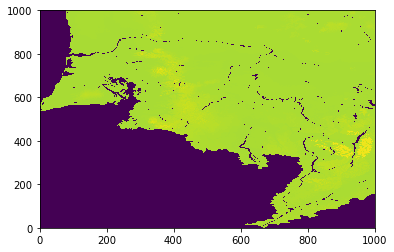

In [48]:
plt.pcolor(prova.values[0][0:1000,0:1000])

In [25]:
swe_masked

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [19]:
prova

<xarray.DataArray (band: 1, y: 3351, x: 6935)>
[23239185 values with dtype=int16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 52.87 52.86 52.85 52.85 ... 24.98 24.97 24.96 24.95
  * x        (x) float64 -124.7 -124.7 -124.7 -124.7 ... -66.96 -66.95 -66.95
Attributes:
    transform:   (0.008333333333333, 0.0, -124.73374999999501, 0.0, -0.008333...
    crs:         +init=epsg:4326
    res:         (0.008333333333333, 0.008333333333333)
    is_tiled:    0
    nodatavals:  (-9999.0,)
    scales:      (1.0,)
    offsets:     (0.0,)

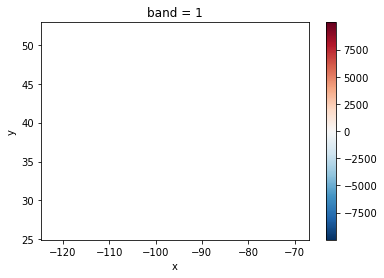

In [20]:
prova.plot()